# Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing cost data sets

staff_d = pd.read_csv('staff_costs.csv')
sub_d=pd.read_csv('subcontractor_costs.csv')
consum_d=pd.read_csv('consumables_costs.csv')
soft_d=pd.read_csv('software_costs.csv')

# Cost bracket analysis

In [3]:
#Creating sum of each cif and year per cost bracket, and adding them for the total costs.

staff_cost = staff_d.set_index(['Cif', 'ye'])['cost']
staff_app = staff_d.set_index(['Cif', 'ye'])['pct']
staff_rd_cost=staff_cost.mul(staff_app/100)
staff_cost_groupby=staff_rd_cost.groupby(['Cif', 'ye']).sum()
staff_cost_sum=pd.DataFrame(staff_cost_groupby)

sub_cost = sub_d.set_index(['Cif', 'ye'])['costs']
sub_app = sub_d.set_index(['Cif', 'ye'])['pct']
sub_rd_cost=sub_cost.mul(sub_app/100)
sub_cost_groupby=sub_rd_cost.groupby(['Cif', 'ye']).sum()
sub_cost_sum=pd.DataFrame(sub_cost_groupby)

consum_cost = consum_d.set_index(['Cif', 'ye'])['costs']
consum_app = consum_d.set_index(['Cif', 'ye'])['pct']
consum_rd_cost=consum_cost.mul(consum_app/100)
consum_cost_groupby=consum_rd_cost.groupby(['Cif', 'ye']).sum()
consum_cost_sum=pd.DataFrame(consum_cost_groupby)

    
soft_cost = soft_d.set_index(['Cif', 'ye'])['costs']
soft_app = soft_d.set_index(['Cif', 'ye'])['pct']
soft_rd_cost=soft_cost.mul(soft_app/100)
soft_cost_groupby=soft_rd_cost.groupby(['Cif', 'ye']).sum()
soft_cost_sum=pd.DataFrame(soft_cost_groupby)



all_costs=pd.concat([staff_cost_sum, sub_cost_sum, consum_cost_sum, soft_cost_sum]).sum(level=['Cif','ye'])
all_costs.reset_index(inplace=True)

newdf=all_costs
newdf.reset_index().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 4 columns):
index    2101 non-null int64
Cif      2101 non-null int64
ye       2101 non-null int64
0        2101 non-null float64
dtypes: float64(1), int64(3)
memory usage: 65.7 KB


In [4]:
#ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


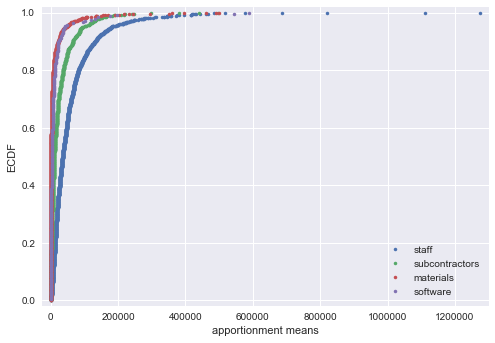

In [5]:
#ecdf of each cost bracket
x_staff, y_staff = ecdf(staff_cost_groupby)
x_subs, y_subs = ecdf(sub_cost_groupby)
x_consum, y_consum = ecdf(consum_cost_groupby)
x_soft, y_soft = ecdf(soft_cost_groupby)

# Plot all ECDFs on the same plot
_ = plt.plot(x_staff, y_staff, marker='.', linestyle='none')
_ = plt.plot(x_subs, y_subs, marker='.', linestyle='none')
_ = plt.plot(x_consum, y_consum, marker='.', linestyle='none')
_ = plt.plot(x_soft, y_soft, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the s
_ = plt.legend(('staff', 'subcontractors', 'materials', 'software'), loc='lower right')
_ = plt.xlabel('apportionment means')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


In [6]:
#80% percentile of each cost bracket
percentiles = np.array([80])
print(np.percentile(staff_cost_groupby, percentiles))
print(np.percentile(sub_cost_groupby, percentiles))
print(np.percentile(consum_cost_groupby, percentiles))
print(np.percentile(soft_cost_groupby, percentiles))

[ 82885.8164]
[ 36430.4655]
[ 8420.15661765]
[ 12220.164]


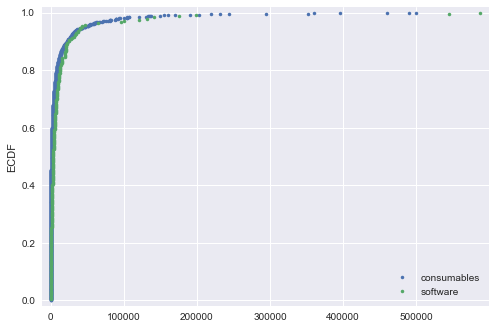

In [7]:
#material and software comparison
x_consum, y_consum = ecdf(consum_cost_groupby)
x_soft, y_soft = ecdf(soft_cost_groupby)

# Plot all ECDFs on the same plot

_ = plt.plot(x_consum, y_consum, marker='.', linestyle='none')
_ = plt.plot(x_soft, y_soft, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the s
_ = plt.legend(('consumables', 'software'), loc='lower right')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [8]:
#permutation function
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

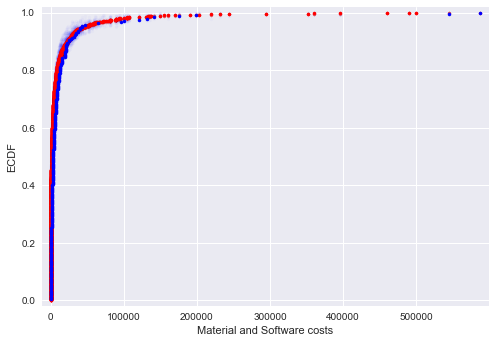

In [9]:
#ecdf plot of permutated data
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(consum_cost_groupby, soft_cost_groupby)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(consum_cost_groupby)
x_2, y_2 = ecdf(soft_cost_groupby)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('Material and Software costs')
_ = plt.ylabel('ECDF')
plt.show()

In [10]:
#P test on distributions of materials and software
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(consum_cost_groupby, soft_cost_groupby)

# Concatenate materials and software: costs_concat
costs_concat = np.concatenate((consum_cost_groupby, soft_cost_groupby))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(costs_concat, size=len(costs_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(consum_cost_groupby)],
                                     bs_sample[len(consum_cost_groupby):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.9621


In [11]:
#merging data set of total R&D costs and individual cost brackets. To calculate cost bracket against total cost.
al_staff=pd.merge(all_costs.reset_index(), staff_cost_sum.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
al_sub=pd.merge(all_costs.reset_index(), sub_cost_sum.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
al_consum=pd.merge(all_costs.reset_index(), consum_cost_sum.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
al_soft=pd.merge(all_costs.reset_index(), soft_cost_sum.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])


Value of r 	Strength of relationship
-1.0 to -0.5 or 1.0 to 0.5 	Strong
-0.5 to -0.3 or 0.3 to 0.5 	Moderate
-0.3 to -0.1 or 0.1 to 0.3 	Weak
-0.1 to 0.1 	None or very weak

In [12]:
#pearson r function
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# staff apportionments Pearson correlation coefficient
staff_cost_r = pearson_r(al_staff['0_x'], al_staff['0_y'])
sub_cost_r = pearson_r(al_sub['0_x'], al_sub['0_y'])
consum_cost_r = pearson_r(al_consum['0_x'], al_consum['0_y'])
soft_cost_r = pearson_r(al_soft['0_x'], al_soft['0_y'])

print(staff_cost_r)
print(sub_cost_r)
print(consum_cost_r)
print(soft_cost_r)

0.915168260082
0.638770108895
0.535594107627
0.643407517805


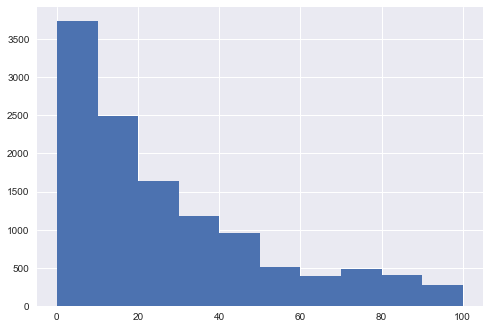

In [13]:
plt.hist(staff_app)
plt.show()

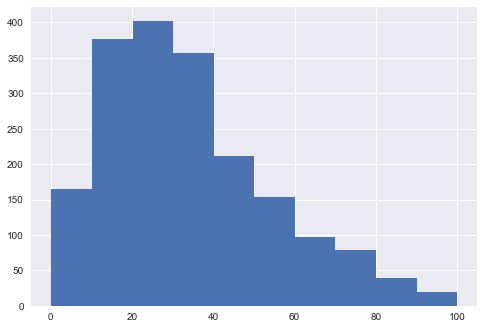

In [14]:
staff_app_mean=staff_d.groupby(['Cif', 'ye'])['pct'].mean()
plt.hist(staff_app_mean)
plt.show()

In [15]:
#Apportionments median created per company and year, and data set added to total costs.

staff_app_median=staff_app.groupby(['Cif', 'ye']).median()
sub_app_median=sub_app.groupby(['Cif', 'ye']).median()
consum_app_median=consum_app.groupby(['Cif', 'ye']).median()
soft_app_median=soft_app.groupby(['Cif', 'ye']).median()

app_al_staff=pd.merge(all_costs.reset_index(), staff_app_median.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
app_al_sub=pd.merge(all_costs.reset_index(), sub_app_median.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
app_al_consum=pd.merge(all_costs.reset_index(), consum_app_median.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
app_al_soft=pd.merge(all_costs.reset_index(), soft_app_median.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])

In [16]:
# Apportionments Pearson correlation coefficient
staff_app_r = pearson_r(app_al_staff[0], app_al_staff['pct'])
sub_app_r = pearson_r(app_al_sub[0], app_al_sub['pct'])
consum_app_r = pearson_r(app_al_consum[0], app_al_consum['pct'])
soft_app_r = pearson_r(app_al_soft[0], app_al_soft['pct'])

print(staff_app_r)
print(sub_app_r)
print(consum_app_r)
print(soft_app_r)

0.137424991915
0.0709040029158
0.0713442123162
0.0381986236897


In [17]:
# cost count and total cost comparison
staff_cost_count=staff_rd_cost.groupby(['Cif', 'ye']).count()
sub_cost_count=sub_rd_cost.groupby(['Cif', 'ye']).count()
consum_cost_count=consum_rd_cost.groupby(['Cif', 'ye']).count()
soft_cost_count=soft_rd_cost.groupby(['Cif', 'ye']).count()


count_al_staff=pd.merge(all_costs.reset_index(), staff_cost_count.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
count_al_sub=pd.merge(all_costs.reset_index(), sub_cost_count.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
count_al_consum=pd.merge(all_costs.reset_index(), consum_cost_count.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])
count_al_soft=pd.merge(all_costs.reset_index(), soft_cost_count.reset_index(), on=['Cif', 'ye'], how='inner').set_index(['Cif','ye'])

In [18]:
# Count Pearson correlation coefficient
staff_count_r = pearson_r(count_al_staff['0_x'], count_al_staff['0_y'])
sub_count_r = pearson_r(count_al_sub['0_x'], count_al_sub['0_y'])
consum_count_r = pearson_r(count_al_consum['0_x'], count_al_consum['0_y'])
soft_count_r = pearson_r(count_al_soft['0_x'], count_al_soft['0_y'])

print(staff_count_r)
print(sub_count_r)
print(consum_count_r)
print(soft_count_r)

0.621962118146
0.398984991155
0.227083227295
0.309845686116


# Importing Client Data

In [19]:
#importing client data

import re
all_d_spread = pd.read_csv('RD All Data Sheet 2018xxx.csv')
all_d_spread[['CIFNo', 'Expr1', 'Claim Phase', 'DateReceived', 'PostCode', 'R&D Claim Name', 'Claim Status']]

yy_regex=re.compile(r'\d{2}$')

all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].str.strip()
all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].astype(str)
all_d_spread['yydd']=all_d_spread['R&D Claim Name'].str.findall(yy_regex)
all_d_spread['yydd']=all_d_spread['yydd'].astype(str).str.replace('\[|\]|\'', '')
clientdata=all_d_spread[all_d_spread.yydd != '']
clientdata=clientdata[clientdata['Claim Status'] == 'Paid']
clientdata['yydd']=clientdata['yydd'].astype(str)
clientdata['CIFNo']=clientdata['CIFNo'].astype(str)

newdf['Cif']=newdf['Cif'].astype(str)
newdf['ye']=newdf['ye'].astype(str)

merged_data=pd.merge(newdf, clientdata, how='left', left_on=['Cif', 'ye'], right_on=['CIFNo', 'yydd'])


all_d=merged_data[['Cif', 'ye', 'Expr1', 'Claim Phase', 'DateReceived', 'ReportSubmitted', 'PostCode', 0, 'Industry']]
all_d.dropna(how='any', axis=0, inplace=True)
all_d[all_d.columns]=all_d.applymap(lambda x: x.strip() if type(x) is str else x)

#Postcode preprocessing
postcode_regex=re.compile(r'^\D{1,}')
all_d.PostCode=all_d.PostCode.str.findall(postcode_regex)
all_d.PostCode=all_d.PostCode.astype(str).str.replace('\[|\]|\'', '')

C:\Users\Iwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,31,32,37,70,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning

# Brief analysis on all costs.

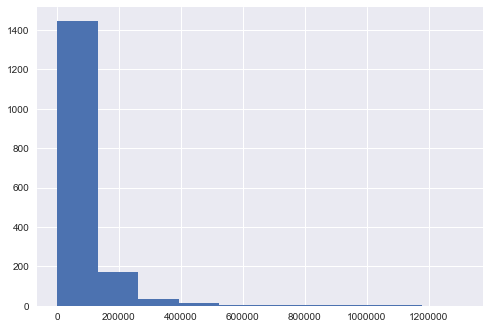

In [20]:
#distribution of all costs 

plt.hist(all_d[0])
plt.show()

In [21]:
# dispersion statistics on total cost information.
rdtotal=all_d[0]

differences_rdtotal = rdtotal - np.mean(rdtotal)

# Square the differences
differences_rdtotal_sq = rdtotal**2


# Compute the mean square difference
rdtotal_variance_explicit = np.mean(rdtotal)

# Compute the variance
rdtotal_variance_np = np.var(rdtotal)

print(rdtotal_variance_explicit, rdtotal_variance_np)

71884.95108833807 10788804995.772781


# Analysis on Industries

In [22]:
#selecting the expenditure data for each industry and all industries.

group_industry=all_d.groupby('Industry')[0]
manuf=all_d[all_d.Industry=='Manufacturing'][0]
it=all_d[all_d.Industry=='IT/Software'][0]
food=all_d[all_d.Industry=='Food & Drink'][0]
mecheng=all_d[all_d.Industry=='Mechanical Engineering'][0]

print(mecheng)

0       519297.676200
1       770372.973000
2        63046.854000
31       85327.981500
32      100082.073000
33      118281.971000
34      141204.507542
37       78628.240000
42      160138.173000
43          77.005417
44      209572.588488
45       61309.741000
46       27227.350000
47       15760.000000
92      111121.954010
93       28650.339000
98        8486.611120
99       17187.252240
100     217636.943800
106      22358.241000
107      29981.850000
118      36775.256000
119      86174.628250
120      89088.565300
121      77136.785000
163        449.125995
164      10747.927500
165      10073.750000
169      52804.426000
170      41003.310000
            ...      
1110     34122.300000
1186     59501.889993
1241     71752.985321
1404     13596.677583
1405     11708.675902
1443     39880.297800
1444     40763.960450
1447    362284.137000
1461    125870.571581
1462     44351.603585
1508      2597.833450
1509       462.136550
1523     10973.293500
1537     56899.845000
1544     1

In [23]:
#dispersion statistics on individual industries, most frequently occuring.
# Array of differences to mean
differences_manuf = manuf - np.mean(manuf)
differences_it = it - np.mean(it)
differences_food = food - np.mean(food)
differences_mecheng = mecheng - np.mean(mecheng)

# Square the differences
differences_manuf_sq = differences_manuf**2
differences_it_sq = differences_it**2
differences_food_sq = differences_food**2
differences_mecheng_sq = differences_mecheng**2

# Compute the mean square difference
manuf_variance_explicit = np.mean(differences_manuf_sq)
it_variance_explicit = np.mean(differences_it_sq)
food_variance_explicit = np.mean(differences_food_sq)
mecheng_variance_explicit = np.mean(differences_mecheng_sq)

# Compute the variance
manuf_variance_np = np.var(manuf)
it_variance_np = np.var(it)
food_variance_np = np.var(food)
mecheng_variance_np = np.var(mecheng)

print(manuf_variance_explicit, manuf_variance_np)
print(it_variance_explicit, it_variance_np)
print(food_variance_explicit, food_variance_np)
print(mecheng_variance_explicit, mecheng_variance_np)


12566620431.925032 12566620431.925032
7833553845.047076 7833553845.047076
23463601825.761566 23463601825.761566
31983163640.793663 31983163640.793663


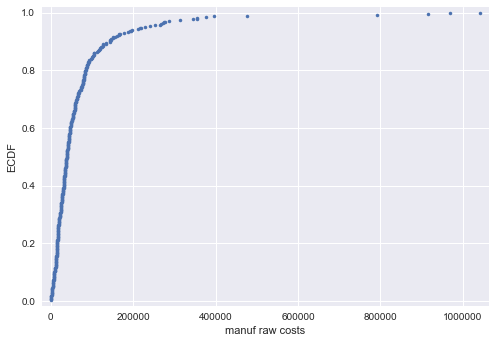

In [24]:
# Compute ECDF for Manufacturing costs
x_manuf, y_manuf = ecdf(manuf)

_ = plt.plot(x_manuf, y_manuf, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('manuf raw costs')
_ = plt.ylabel('ECDF')

plt.show()


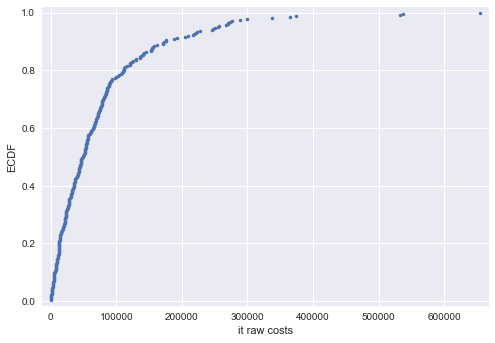

In [25]:
# Compute ECDF for IT and Software related costs
x_it, y_it = ecdf(it)

_ = plt.plot(x_it, y_it, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('it raw costs')
_ = plt.ylabel('ECDF')

plt.show()


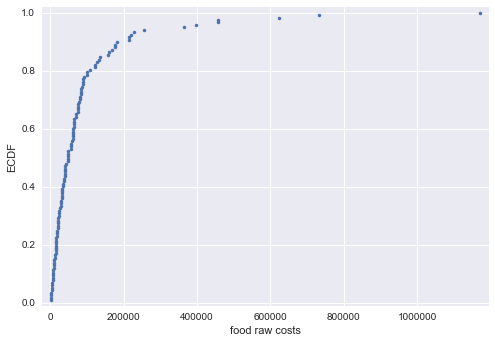

In [26]:
# Compute ECDF for Food & Drink related costs

x_food, y_food = ecdf(food)

_ = plt.plot(x_food, y_food, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('food raw costs')
_ = plt.ylabel('ECDF')

plt.show()

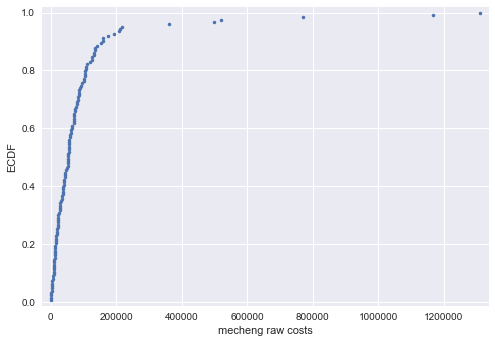

In [27]:
# Compute ECDF for Mechanical Engineering related costs

x_mecheng, y_mecheng = ecdf(mecheng)

_ = plt.plot(x_mecheng, y_mecheng, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('mecheng raw costs')
_ = plt.ylabel('ECDF')

plt.show()

In [28]:
print(np.percentile(manuf, percentiles))
print(np.percentile(it, percentiles))
print(np.percentile(food, percentiles))
print(np.percentile(mecheng, percentiles))

[ 85613.82709]
[ 111001.1695]
[ 107659.297875]
[ 106167.39394615]


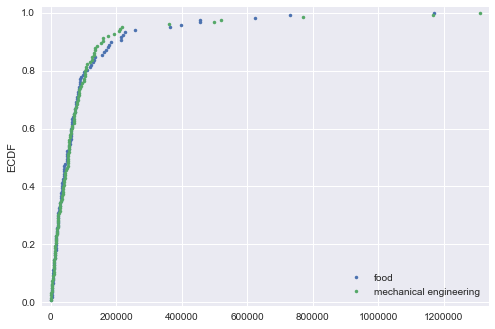

In [29]:
# Compute ECDF for Food and Mechanical Engineering related costs together.
x_food, y_food = ecdf(food)


x_manuf, y_manuf = ecdf(mecheng)

_ = plt.plot(x_food, y_food, marker='.', linestyle='none')
_ = plt.plot(x_manuf, y_manuf, marker='.', linestyle='none')
_ = plt.legend(('food', 'mechanical engineering'), loc='lower right')

plt.margins(0.02)

_ = plt.ylabel('ECDF')

plt.show()

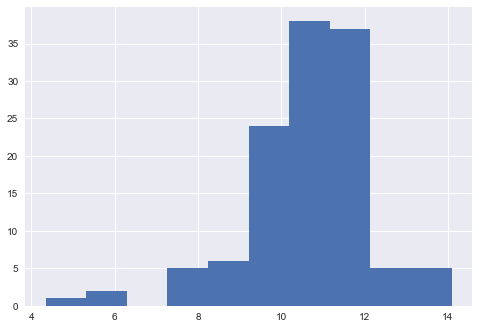

10.613652239068786

In [30]:
#check distribution of Mechanical Engineering costs
log_mecheng=np.log(mecheng)
log_mecheng.hist()
plt.show()
log_mecheng.mean()

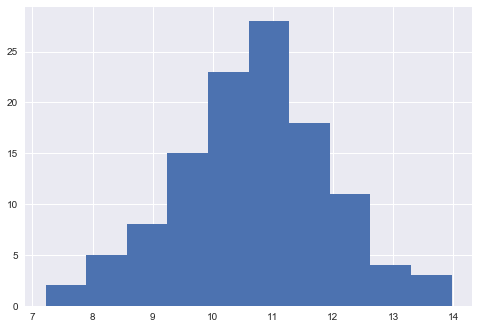

In [31]:
log_food=np.log(food)
log_food.hist()
plt.show()

In [32]:
#Quick look at dispersion statistics
print(log_mecheng.std())
print(log_food.std())

1.4559615989176917
1.2604646545483376


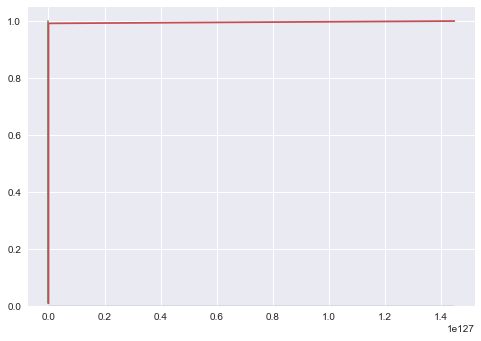

In [33]:
# Trying to look at sampling the log normal data and plotting the ecdf...

import matplotlib.pyplot as plt
mean_manuf=np.mean(log_mecheng)
std_manuf=np.std(log_mecheng)

manuf_samples=np.random.lognormal(log_mecheng, 100)

ecdf_x, ecdf_y=ecdf(manuf_samples)
_=plt.hist(manuf_samples, bins=10, normed=True, histtype='step')
x, y=ecdf(log_mecheng)
_=plt.plot(x, y)
_=plt.plot(ecdf_x, ecdf_y)
plt.show()

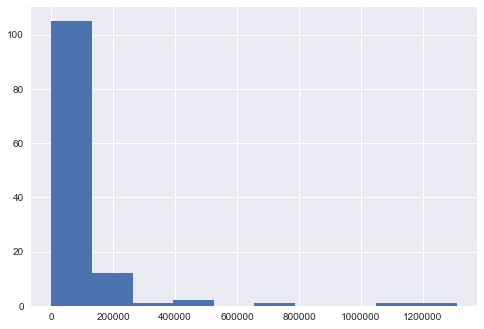

In [34]:
# visualising source of log normal data, Mechanical Engineering and Food and Drink.
mecheng.hist()
plt.show()

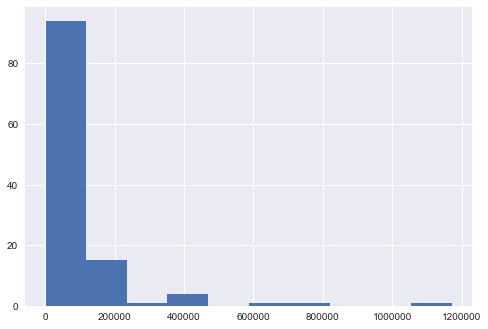

In [35]:
food.hist()
plt.show()

In [36]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(log_food) - np.mean(log_mecheng)

# Get bootstrap replicates of means
bs_replicates_food = draw_bs_reps(log_food, np.mean, 10000)
bs_replicates_mecheng = draw_bs_reps(log_mecheng, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_food - bs_replicates_mecheng

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)

difference of means = 0.06961686972487158
95% confidence interval = [-0.26711199  0.41961779]


In [37]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((log_food, log_mecheng)))

# Shift the samples
food_shifted = log_food - np.mean(log_food) + combined_mean
manuf_shifted = log_mecheng - np.mean(log_mecheng) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_food = draw_bs_reps(food_shifted, np.mean, 10000)
bs_replicates_manuf = draw_bs_reps(manuf_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_manuf - bs_replicates_food

# Compute the p-value of what is less than 0 difference in means
p = np.sum(bs_diff_replicates < 0) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.4925


 # Analysis on categorical data.

In [38]:
#postcodes categorised and spearman correlation
postcodes_categorised=all_d.assign(PostCode=all_d.PostCode.astype('category').cat.codes)
postcodes_categorised.PostCode.corr(postcodes_categorised[0], method='spearman')

-0.011846824252031166

In [39]:
all_d.PostCode.value_counts()

M       109
LE       61
SK       49
L        48
WA       40
BB       39
W        39
BD       37
S        35
CH       32
E        32
N        32
YO       31
BS       30
WF       29
OL       28
CM       28
BH       27
CV       26
MK       26
BL       26
NG       24
KT       23
SS       23
PR       23
SW       22
SE       21
DE       20
IP       19
BA       19
       ... 
SR        5
DY        4
SP        4
WN        4
DH        4
DT        4
TS        4
DA        4
LU        4
SM        3
TF        3
PA        3
KY        3
CO        2
PL        2
PH        2
RC        2
FK        2
CRO       2
LD        2
TW        2
CT        2
BT        2
KA        2
AB        2
FY        1
HR        1
Y         1
WR        1
IE        1
Name: PostCode, Length: 113, dtype: int64

In [40]:
#industry categorised and spearman correlation
industry_categorised=all_d.assign(Industry=all_d.Industry.astype('category').cat.codes)
industry_categorised.Industry.corr(industry_categorised[0], method='spearman')

-0.020922022334200551

In [41]:
# year end categorised and spearman correlation
ye_categorised=all_d.assign(Expr1=all_d.Expr1.astype('category').cat.codes)
ye_categorised.Expr1.corr(ye_categorised[0], method='spearman')

-0.056804451773478259

In [42]:
all_d.Industry.value_counts()

Manufacturing                             382
IT/Software                               286
Mechanical Engineering                    123
Food & Drink                              117
Construction                               87
Management/Consulting/Training             63
Electronics                                57
Printing/Publishing/Literature Binding     53
Telecommunications                         37
Logistics & Distribution                   34
Retail                                     33
Wholesalers/Imports                        28
Design                                     27
Motor Industry                             25
Pharmaceuticals                            25
Medical Industry                           22
Fabric/Clothing                            19
Finance                                    18
Marketing/Digital Marketing                15
Accountancy                                15
Taxi Industry                              15
Waste Processing                  

In [43]:
#claim phase categorised and spearman correlation
phase=all_d
phase['Claim Phase'] = phase['Claim Phase'].astype('category')
phase['Claim Phase'].cat.categories = [1,2,3,4,5]
phase['Claim Phase'] = phase['Claim Phase'].astype('float')
phase['Claim Phase'].corr(phase[0], method='spearman')

C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.1045927104246827